In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Trends Across Race, Sex for Ages 20-29

For individuals 20-29 with SSL scores, showing the total number of individuals with a score greater than or equal to a cutoff to visualize the drop.

In [3]:
ssl_df = pd.read_csv('data/Strategic_Subject_List.csv')
ssl_df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SSL_SCORE,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,...,RAW_HEAT_SCORE,STATUS_I,PRE_RAW_HEAT_SCORE,TRAP_FLAGS,SSL_FLAGS,LATITUDE,LONGITUDE,CENSUS_TRACT,COMMUNITY_AREA,LOCATION
0,500,20-30,0,1,4,1,1,1.0,1,M,...,0.14196,Y,14196,NaN,24.0,NaN,NaN,NaN,,NaN
1,500,20-30,0,9,1,1,0,1.0,0,M,...,0.14511,Y,14511,NaN,8.0,NaN,NaN,NaN,,NaN
2,500,less than 20,1,2,1,1,3,1.0,0,M,...,0.12982,Y,12982,NaN,8.0,NaN,NaN,NaN,,NaN
3,500,less than 20,1,1,4,1,0,1.6,1,M,...,0.13110,Y,13110,NaN,NaN,NaN,NaN,NaN,,NaN
4,500,less than 20,0,0,5,0,0,1.3,3,M,...,0.12874,Y,12874,NaN,NaN,NaN,NaN,NaN,,NaN


In [4]:
# For each score from 1-500, calculating the number of individuals by race and sex that 
# have SSL scores greater than or equal to that score
# Likely a faster way of doing this, but works for now
ssl_dicts = [{'gte_ssl_score': s} for s in range(1,501)]

def ssl_gte_counts(race, sex, score):
    return ssl_df.loc[(ssl_df['RACE_CODE_CD'] == race) & 
                      (ssl_df['SEX_CODE_CD'] == sex) & 
                      (ssl_df['AGE_GROUP'] == '20-30') &
                      (ssl_df['SSL_SCORE'] >= score), 'SSL_SCORE'].count()

for s in ssl_dicts:
    s['black_men_20_29'] = ssl_gte_counts('BLK', 'M', s['gte_ssl_score'])
    s['black_women_20_29'] = ssl_gte_counts('BLK', 'F', s['gte_ssl_score'])
    s['white_men_20_29'] = ssl_gte_counts('WHI', 'M', s['gte_ssl_score'])
    s['white_women_20_29'] = ssl_gte_counts('WHI', 'F', s['gte_ssl_score'])
    s['hispanic_men_20_29'] = ssl_gte_counts('WWH', 'M', s['gte_ssl_score'])
    s['hispanic_women_20_29'] = ssl_gte_counts('WWH', 'F', s['gte_ssl_score'])
    
ssl_gte_df = pd.DataFrame(ssl_dicts)
ssl_gte_df = ssl_gte_df.set_index(ssl_gte_df['gte_ssl_score'])
ssl_cols = ssl_gte_df.columns.values.tolist()
ssl_cols.remove('gte_ssl_score')
ssl_gte_df = ssl_gte_df[ssl_cols]
ssl_gte_df.head()

,black_men_20_29,black_women_20_29,hispanic_men_20_29,hispanic_women_20_29,white_men_20_29,white_women_20_29
gte_ssl_score,,,,,,
1,51664,20092,29787,7034,21328,7478
2,51664,20092,29787,7034,21328,7478
3,51664,20092,29787,7034,21328,7478
4,51664,20092,29787,7034,21328,7478
5,51664,20092,29787,7034,21328,7478


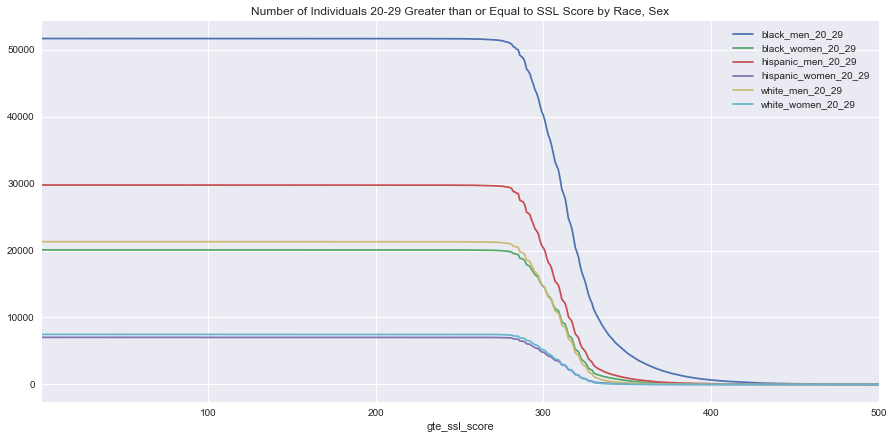

In [5]:
plt.rcParams["figure.figsize"] = [15, 7]
ssl_gte_df.plot(title='Number of Individuals 20-29 Greater than or Equal to SSL Score by Race, Sex')

In [6]:
# Getting the same information, but only for Chicago residents
ssl_chi_dicts = [{'gte_ssl_score': s} for s in range(1,501)]

def ssl_chi_gte_counts(race, sex, score):
    return ssl_df.loc[(ssl_df['RACE_CODE_CD'] == race) & 
                      (ssl_df['SEX_CODE_CD'] == sex) & 
                      (ssl_df['LATEST_DIST_RES'] != 31) &
                      (ssl_df['AGE_GROUP'] == '20-30') &
                      (ssl_df['SSL_SCORE'] >= score), 'SSL_SCORE'].count()

for s in ssl_chi_dicts:
    s['black_men_20_29'] = ssl_chi_gte_counts('BLK', 'M', s['gte_ssl_score'])
    s['black_women_20_29'] = ssl_chi_gte_counts('BLK', 'F', s['gte_ssl_score'])
    s['white_men_20_29'] = ssl_chi_gte_counts('WHI', 'M', s['gte_ssl_score'])
    s['white_women_20_29'] = ssl_chi_gte_counts('WHI', 'F', s['gte_ssl_score'])
    s['hispanic_men_20_29'] = ssl_chi_gte_counts('WWH', 'M', s['gte_ssl_score'])
    s['hispanic_women_20_29'] = ssl_chi_gte_counts('WWH', 'F', s['gte_ssl_score'])
    
ssl_chi_gte_df = pd.DataFrame(ssl_chi_dicts)
ssl_chi_gte_df = ssl_chi_gte_df.set_index(ssl_chi_gte_df['gte_ssl_score'])
ssl_chi_cols = ssl_chi_gte_df.columns.values.tolist()
ssl_chi_cols.remove('gte_ssl_score')
ssl_chi_gte_df = ssl_chi_gte_df[ssl_chi_cols]
ssl_chi_gte_df.head()

,black_men_20_29,black_women_20_29,hispanic_men_20_29,hispanic_women_20_29,white_men_20_29,white_women_20_29
gte_ssl_score,,,,,,
1,33836,11638,15576,3201,5192,1777
2,33836,11638,15576,3201,5192,1777
3,33836,11638,15576,3201,5192,1777
4,33836,11638,15576,3201,5192,1777
5,33836,11638,15576,3201,5192,1777


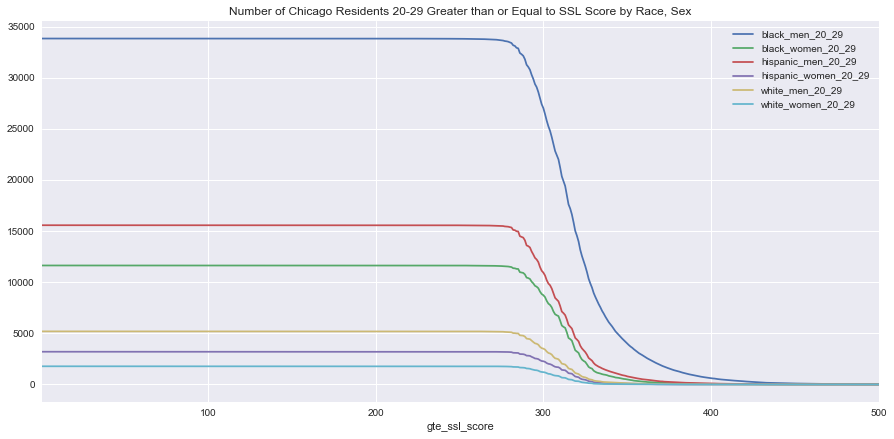

In [7]:
ssl_chi_gte_df.plot(title='Number of Chicago Residents 20-29 Greater than or Equal to SSL Score by Race, Sex')

In [8]:
ssl_gte_df.to_csv('data/ssl_gte_score_by_race_sex.csv')
ssl_chi_gte_df.to_csv('data/ssl_gte_score_chi_by_race_sex.csv')

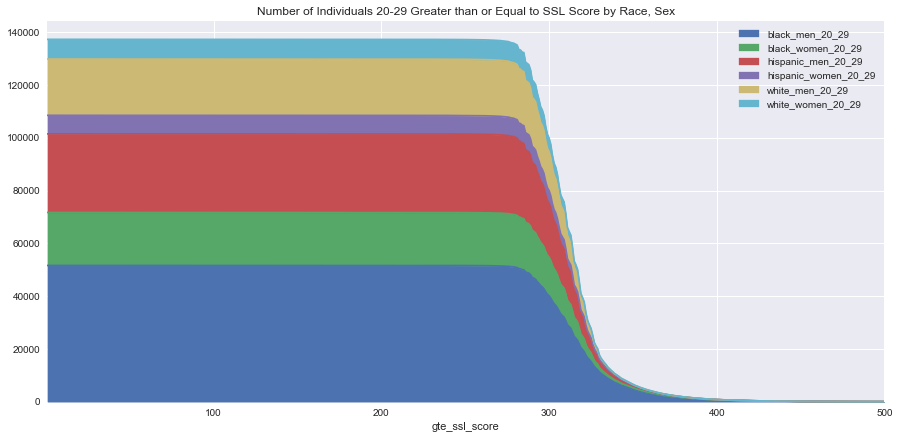

In [9]:
ssl_gte_df.plot.area(title='Number of Individuals 20-29 Greater than or Equal to SSL Score by Race, Sex')

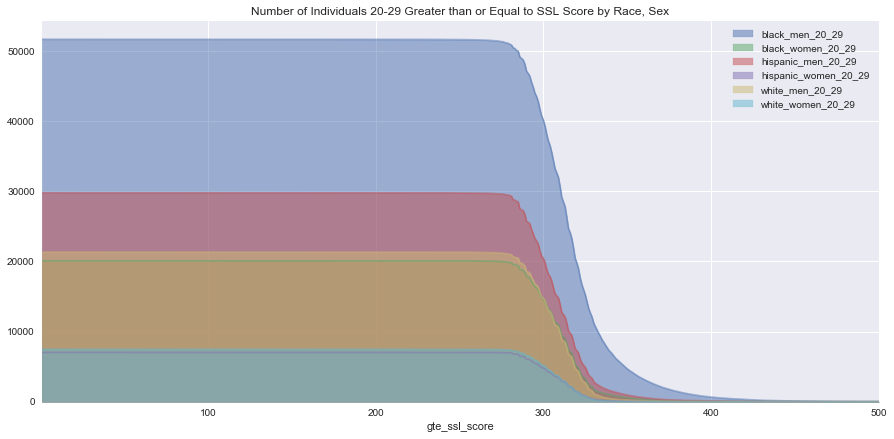

In [10]:
ssl_gte_df.plot.area(stacked=False, title='Number of Individuals 20-29 Greater than or Equal to SSL Score by Race, Sex')

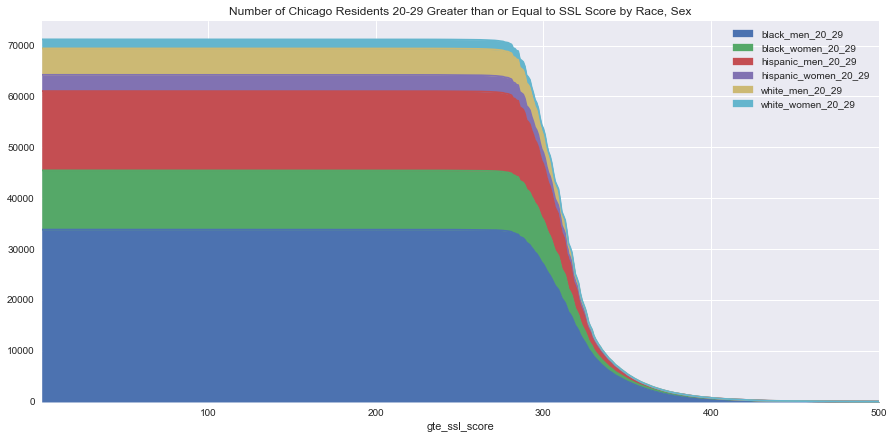

In [11]:
ssl_chi_gte_df.plot.area(title='Number of Chicago Residents 20-29 Greater than or Equal to SSL Score by Race, Sex')

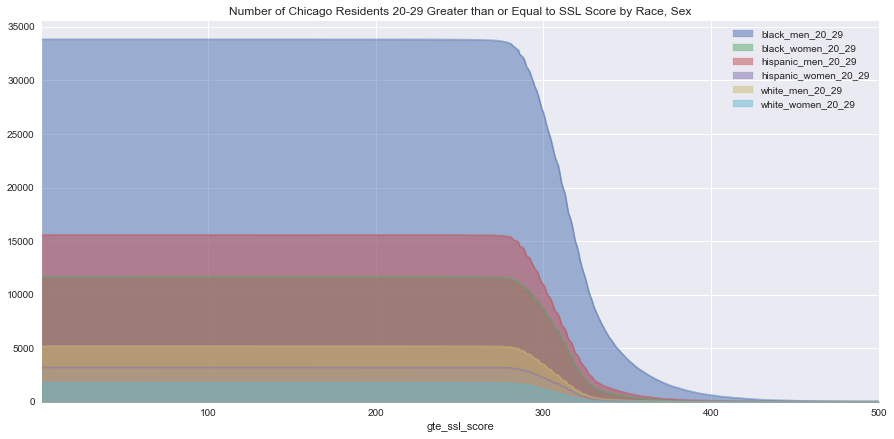

In [12]:
ssl_chi_gte_df.plot.area(stacked=False, title='Number of Chicago Residents 20-29 Greater than or Equal to SSL Score by Race, Sex')